<a href="https://colab.research.google.com/github/IgorKhudakuev/Yandex_practicum/blob/main/Kaggle_hotels_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пример baseline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Будем предсказывать оценку отелю по отзывам

Hotel_Address         -  Адрес отеля, object<br>
Review_Date           -  Дата публикации отзыва, object<br>
Average_Score         -  Средяя оценка отеля, расчитанная на основе комментарияев за последний год, float64<br>
Hotel_Name            -  Название отеля, object<br>
Reviewer_Nationality  -  Национальность рецензента, object<br>
Negative_Review       -  Отрицательный отзыв, оставленный рецензентом отелю. В случае отсутствия заполняется значением "No Negative", object<br>
Review_Total_Negative_Word_Counts - Количество слов в отрицательном отзыве, int64<br>
Positive_Review       -  Положительный отзыв, оставленный рецензентом отелю. В случае отсутствия заполняется значением "No Positive", object<br>
Review_Total_Positive_Word_Counts - Количество слов в положительном отзыве, int64<br>
Total_Number_of_Reviews_Reviewer_Has_Given - Количество отзывов, написанных рецензентом в прошлом, int64<br>
Total_Number_of_Reviews - Количество отзывов об отеле, int64<br>
Tags                  -  Теги, данные рецензентом отелю, object<br>
days_since_review     -  Количество дней между написанием отзыва и чисткой, int64<br>
Additional_number_of_soring - Средний балл отеля, на основе всех оценок - с тектом отзыва и без, int64<br>
lat                   -  Широта отеля, float64<br>
lng                   -  Протяженность отеля, float64<br>

**Reviewer_Score**        -  Оценка, данная рецензентом отелю, float64. Целевая переменная

------------------------------------------------

### 2. Загрузка и разведочный анализ данных. Кодирование категориальных признаков

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Hotels dataset/train.csv')
print(train.shape)
train.head(2)

(412590, 16)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,Ndsm Plein 28 Amsterdam Noord 1033 WB Amsterda...,170,4/17/2017,DoubleTree by Hilton Hotel Amsterdam NDSM Wharf,United Kingdom,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",108 day,52.400181,4.893665
1,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,114,5/26/2016,Savoy Hotel Amsterdam,Malaysia,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,"[' Leisure trip ', ' Couple ', ' Small Double ...",434 day,52.349743,4.891191


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Hotels dataset/test.csv')
print(test.shape)
test.head(2)

(103148, 15)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng
0,7 Western Gateway Royal Victoria Dock Newham L...,359,8/14/2015,Novotel London Excel,United Kingdom,No Negative,0,1158,Excellent location for Excel centre Friendly ...,14,5,"[' Leisure trip ', ' Family with young childre...",720 day,51.507720,0.022981
1,Great Cumberland Place Westminster Borough Lon...,1190,8/3/2017,The Cumberland A Guoman Hotel,Gibraltar,No Negative,0,5180,The location was excellent rieally good next ...,11,2,"[' Leisure trip ', ' Group ', ' Standard Doubl...",0 days,51.514879,-0.160650


In [ ]:
test['Reviewer_Score'] = -1

In [ ]:
print(test.shape)
test.head(2)

(103148, 16)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Tags,days_since_review,lat,lng,Reviewer_Score
0,7 Western Gateway Royal Victoria Dock Newham L...,359,8/14/2015,Novotel London Excel,United Kingdom,No Negative,0,1158,Excellent location for Excel centre Friendly ...,14,5,"[' Leisure trip ', ' Family with young childre...",720 day,51.507720,0.022981,-1
1,Great Cumberland Place Westminster Borough Lon...,1190,8/3/2017,The Cumberland A Guoman Hotel,Gibraltar,No Negative,0,5180,The location was excellent rieally good next ...,11,2,"[' Leisure trip ', ' Group ', ' Standard Doubl...",0 days,51.514879,-0.160650,-1


In [ ]:
#data = train.append(test, ignore_index=True)
data = pd.concat([train, test], axis=0, ignore_index=True)
print(data.shape)
data.info()

(515738, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Hotel_Name                                  515738 non-null  object 
 4   Reviewer_Nationality                        515738 non-null  object 
 5   Negative_Review                             515738 non-null  object 
 6   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews                     515738 non-null  int64  
 8   Positive_Review                             515738 non-null  object 
 9   Review_Total_Positive_Word_Counts           515738 non-nu

------------------

In [ ]:
# Типы данных
data.dtypes

,0
Hotel_Address,object
Additional_Number_of_Scoring,int64
Review_Date,object
Hotel_Name,object
Reviewer_Nationality,object
Negative_Review,object
Review_Total_Negative_Word_Counts,int64
Total_Number_of_Reviews,int64
Positive_Review,object
Review_Total_Positive_Word_Counts,int64


In [ ]:
# Посмотрим на статистику числовых признаков
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Additional_Number_of_Scoring,515738.0,498.081836,500.538467,1.000000,169.000000,341.000000,660.000000,2682.000000
Review_Total_Negative_Word_Counts,515738.0,18.539450,29.690831,0.000000,2.000000,9.000000,23.000000,408.000000
Total_Number_of_Reviews,515738.0,2743.743944,2317.464868,43.000000,1161.000000,2134.000000,3613.000000,16670.000000
Review_Total_Positive_Word_Counts,515738.0,17.776458,21.804185,0.000000,5.000000,11.000000,22.000000,395.000000
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,7.166001,11.040228,1.000000,1.000000,3.000000,8.000000,355.000000
Reviewer_Score,515738.0,6.516039,4.033475,-1.000000,5.400000,8.300000,9.600000,10.000000
lat,512470.0,49.442439,3.466325,41.328376,48.214662,51.499981,51.516288,52.400181
lng,512470.0,2.823803,4.579425,-0.369758,-0.143372,0.010607,4.834443,16.429233


In [ ]:
# Количество пропущенных значений в столбиках
data.isnull().sum()[data.isnull().sum()>0]

# Поскольку, несмотря на пропуски в значениях долготы и широты, в датасете имеется информация о стране, в которой находится отель,
# мы можем заполнить их валидными значениями самостоятельно, что и сделаем ниже.

,0
lat,3268
lng,3268


In [ ]:
# Извлечём из даты отзыва полезную информацию - год и месяц

data['Review_year'] = data['Review_Date'].apply(lambda x: int(x.split('/')[2]))
data['Review_month'] = data['Review_Date'].apply(lambda x: int(x.split('/')[0]))

In [ ]:
data.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_year,Review_month
0,Ndsm Plein 28 Amsterdam Noord 1033 WB Amsterda...,170,4/17/2017,DoubleTree by Hilton Hotel Amsterdam NDSM Wharf,United Kingdom,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",108 day,52.400181,4.893665,2017,4
1,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,114,5/26/2016,Savoy Hotel Amsterdam,Malaysia,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,"[' Leisure trip ', ' Couple ', ' Small Double ...",434 day,52.349743,4.891191,2016,5


In [ ]:
!pip install flashgeotext

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.3/447.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9300 sha256=50f2b2528b5d1f29b98e1e818480646b01848d21291cd0d0bbf8fb8c77cb4c9e
  Stored in directory: /root/.cache/pip/wheels/49/20/47/f03dfa8a7239c54cbc44ff7389eefbf888d2c1873edaaec888
Successfully built flashtext


In [ ]:
# Функция для извлечение географических названий (в нашем случае страны/города) из строки

from flashgeotext.geotext import GeoText

def get_location(text, obj = "countries"): # cities
    try:
        geotext = GeoText()
        res = geotext.extract(input_text = text)
        return list(res[obj].keys())[-1]
    except:
        return 'XNA'

Поскольку уникальных адресов в таблице не так много, будет проще сначала обработать каждый из них, а затем применить полученную мапу для всех строк

In [ ]:
# Уникальные адреса

addresses = list(set(data['Hotel_Address'].values))
len(addresses)

1493

In [ ]:
# Осторожно, считается долго

from ipywidgets import IntProgress
from IPython.display import display
import time

f = IntProgress(min = 0, max = len(addresses))
display(f)

map_address_location = {}
for address in addresses:
    f.value += 1
    map_address_location[address] = {'country': get_location(address), "city": get_location(address, 'cities')}

IntProgress(value=0, max=1493)

In [ ]:
# Извлекли страну и город

map_address_location

{'111 Westminster Bridge Road Lambeth London SE1 7JD United Kingdom': {'country': 'United Kingdom',
  'city': 'London'},
 '13 Rue Jules Cesar 12th arr 75012 Paris France': {'country': 'France',
  'city': 'Parys'},
 'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom': {'country': 'United Kingdom',
  'city': 'London'},
 '5 Rue Belidor 17th arr 75017 Paris France': {'country': 'France',
  'city': 'Parys'},
 'Sch nbrunner Stra e 41 05 Margareten 1050 Vienna Austria': {'country': 'Austria',
  'city': 'Vienna'},
 'Dels Lledo 7 Ciutat Vella 08003 Barcelona Spain': {'country': 'Spain',
  'city': 'Barcelona'},
 '10 rue Lamartine 9th arr 75009 Paris France': {'country': 'France',
  'city': 'Parys'},
 '12 rue de Parme 9th arr 75009 Paris France': {'country': 'France',
  'city': 'Parys'},
 'Prinses Irenestraat 30 Zuideramstel 1077 WX Amsterdam Netherlands': {'country': 'Netherlands',
  'city': 'Amsterdam'},
 '9 Knaresborough Place Kensington and Chelsea London SW5 0TP U

In [ ]:
data['country'] = data['Hotel_Address'].apply(lambda x: map_address_location[x]['country'])
data['city'] = data['Hotel_Address'].apply(lambda x: map_address_location[x]['city'])

In [ ]:
data.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_year,Review_month,country,city
0,Ndsm Plein 28 Amsterdam Noord 1033 WB Amsterda...,170,4/17/2017,DoubleTree by Hilton Hotel Amsterdam NDSM Wharf,United Kingdom,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",108 day,52.400181,4.893665,2017,4,Netherlands,Amsterdam
1,Ferdinand Bolstraat 194 Oud Zuid 1072 LW Amste...,114,5/26/2016,Savoy Hotel Amsterdam,Malaysia,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,"[' Leisure trip ', ' Couple ', ' Small Double ...",434 day,52.349743,4.891191,2016,5,Netherlands,Amsterdam
2,18 Albert Embankment Lambeth London SE1 7TJ Un...,1195,12/4/2016,Park Plaza London Riverbank,United Kingdom,The hot breakfast could have been fresher tas...,19,4684,The room was to a high standard The staff wer...,19,3,8.8,"[' Business trip ', ' Solo traveler ', ' Super...",242 day,51.491374,-0.121419,2016,12,United Kingdom,London


In [ ]:
data['country'].value_counts()

,count
country,
United Kingdom,262301
Spain,60149
France,59928
Netherlands,57214
Austria,38939
Italy,37207


In [ ]:
# Теперь мы можем заменить пропущенные значения долготы и широты:

data[data['lat'].isna()]['country'].value_counts()

,count
country,
Austria,2679
France,382
Spain,207


Как мы видим, пропуски присутствуют только у трёх стран, благодаря чему можно заполнить их вручную - наприме, средними значениями.

In [ ]:
data.loc[data['country'] == "Austria", 'lat'] = data[data['country'] == "Austria"]['lat'].fillna(np.mean(data[(data['country'] == "Austria") & (data['lat'].notna())]['lat'].values))
data.loc[data['country'] == "Austria", 'lng'] = data[data['country'] == "Austria"]['lng'].fillna(np.mean(data[(data['country'] == "Austria") & (data['lng'].notna())]['lng'].values))

In [ ]:
data.loc[data['country'] == "France", 'lat'] = data[data['country'] == "France"]['lat'].fillna(np.mean(data[(data['country'] == "France") & (data['lat'].notna())]['lat'].values))
data.loc[data['country'] == "France", 'lng'] = data[data['country'] == "France"]['lng'].fillna(np.mean(data[(data['country'] == "France") & (data['lng'].notna())]['lng'].values))

In [ ]:
data.loc[data['country'] == "Spain", 'lat'] = data[data['country'] == "Spain"]['lat'].fillna(np.mean(data[(data['country'] == "Spain") & (data['lat'].notna())]['lat'].values))
data.loc[data['country'] == "Spain", 'lng'] = data[data['country'] == "Spain"]['lng'].fillna(np.mean(data[(data['country'] == "Spain") & (data['lng'].notna())]['lng'].values))

In [ ]:
# Убедимся, что пропусков больше нет

data.isnull().sum()[data.isnull().sum()>0]

,0


In [ ]:
# В колонке days_since_review оставим только цифру

data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split()[0]))

In [ ]:
data = data.drop(columns = ['Hotel_Address', 'Review_Date'])

In [ ]:
data.head(3)

,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_year,Review_month,country,city
0,170,DoubleTree by Hilton Hotel Amsterdam NDSM Wharf,United Kingdom,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",108,52.400181,4.893665,2017,4,Netherlands,Amsterdam
1,114,Savoy Hotel Amsterdam,Malaysia,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,"[' Leisure trip ', ' Couple ', ' Small Double ...",434,52.349743,4.891191,2016,5,Netherlands,Amsterdam
2,1195,Park Plaza London Riverbank,United Kingdom,The hot breakfast could have been fresher tas...,19,4684,The room was to a high standard The staff wer...,19,3,8.8,"[' Business trip ', ' Solo traveler ', ' Super...",242,51.491374,-0.121419,2016,12,United Kingdom,London


In [ ]:
# Начальные значения признака Hotel_Name
len(data['Hotel_Name'].unique())

1492

In [ ]:
# Выполняем классическое кодирование категориальных признаков, для которых one-hot encoding не подходит из-за
# большого количества вариантов

label_enc_features = ['Hotel_Name', 'city', 'Reviewer_Nationality']

for feature in label_enc_features:
    lab_enc = LabelEncoder()
    data[feature] = lab_enc.fit_transform(data[feature])

data.head(2)

,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_year,Review_month,country,city
0,170,280,214,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,"[' Leisure trip ', ' Couple ', ' Queen Guest R...",108,52.400181,4.893665,2017,4,Netherlands,0
1,114,1233,126,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,"[' Leisure trip ', ' Couple ', ' Small Double ...",434,52.349743,4.891191,2016,5,Netherlands,0


In [ ]:
# Выполняем one_hot - кодирование для признака country

oh_features = ['country']

print('Shape before:', data.shape)

one_hot = pd.get_dummies(data[oh_features])
data = data.drop(columns = oh_features, axis = 1)
data = pd.concat([data, one_hot], axis=1)

print('Shape after:', data.shape)

data.head(2)

Shape before: (515738, 18)
Shape after: (515738, 23)


,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,lng,Review_year,Review_month,city,country_Austria,country_France,country_Italy,country_Netherlands,country_Spain,country_United Kingdom
0,170,280,214,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,...,4.893665,2017,4,0,False,False,False,True,False,False
1,114,1233,126,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,...,4.891191,2016,5,0,False,False,False,True,False,False


Обработка текстовых полей (теги и тексты отзывов)

Что сделаем: с помощью встроенной либы sklearn найдём 30 самый частых тегов, а затем превратим их в 30 новых колонок, в которых будет содерждаться флаг (число 0 или 1) - встречается указанный тег в отзыве или нет.

Аналогичным образом поступим с тестами отзывов, однако будем анализировать отдельные слова.
Новыми признаками будут 200 колонок самых частых слов из негативных отзывов и 200 колонок для положительных отзывов.

- Помним про стоп-слова и лемматизацию

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def analyzer(string):
    return string.replace('[', "").replace(']', "").replace('"', "").replace("'", "").replace('  ', " ").strip().split(' , ')

freq_vector = CountVectorizer(stop_words = "english", max_features = 30, analyzer = analyzer)
tags_matrix = freq_vector.fit_transform(data['Tags'].values)

In [ ]:
# Самые частые теги

freq_vector.get_feature_names_out()

array(['2 rooms', 'Business trip', 'Classic Double Room',
       'Classic Double or Twin Room', 'Couple', 'Deluxe Double Room',
       'Double Room', 'Double or Twin Room', 'Executive Double Room',
       'Family with older children', 'Family with young children',
       'Group', 'Leisure trip', 'Single Room', 'Solo traveler',
       'Standard Double Room', 'Standard Double or Twin Room',
       'Standard Twin Room', 'Stayed 1 night', 'Stayed 2 nights',
       'Stayed 3 nights', 'Stayed 4 nights', 'Stayed 5 nights',
       'Stayed 6 nights', 'Stayed 7 nights',
       'Submitted from a mobile device', 'Superior Double Room',
       'Superior Double or Twin Room', 'Superior Twin Room', 'Twin Room'],
      dtype=object)

In [ ]:
print(tags_matrix.toarray().shape)
tags_matrix.toarray()

(515738, 30)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
# Добавим новые колонки в наш датасет
# У всех колонок будет общий префикс tag_

tag_data = pd.DataFrame(tags_matrix.toarray(), columns = ["tag_" + str(num) for num in range(30)])
data = pd.concat([data, tag_data], axis=1)

data = data.drop(columns = ['Tags'])
data.head(2)

,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28,tag_29
0,170,280,214,Too far from attractions Had to use ferry to ...,72,1593,Staff were very helpful Good breakfast,8,1,5.4,...,1,0,0,0,0,1,0,0,0,0
1,114,1233,126,Staff should handle customer document during ...,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
data.shape

(515738, 52)

In [ ]:
# Аналогично анализируем слова из негативных отзывов, попутно удаляя служебные и неинформативные

freq_vector = CountVectorizer(stop_words = "english", max_features = 200)
review_negative_matrix = freq_vector.fit_transform(data['Negative_Review'].values)

print(review_negative_matrix.toarray().shape)

# Добавляем в датасет 200 колонок с префиксом rn_
review_negative = pd.DataFrame(review_negative_matrix.toarray(), columns = ["rn_" + str(num) for num in range(200)])
data = pd.concat([data, review_negative], axis=1)

data = data.drop(columns = ['Negative_Review'])
data.head(2)

(515738, 200)


,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,...,rn_190,rn_191,rn_192,rn_193,rn_194,rn_195,rn_196,rn_197,rn_198,rn_199
0,170,280,214,72,1593,Staff were very helpful Good breakfast,8,1,5.4,108,...,0,0,0,0,0,0,0,0,0,0
1,114,1233,126,246,995,Very clean and cozy room Friendly and helpful...,41,1,9.6,434,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Всё то же самое для положительных отзывов

freq_vector = CountVectorizer(stop_words = "english", max_features = 200)
review_positive_matrix = freq_vector.fit_transform(data['Positive_Review'].values)

print(review_positive_matrix.toarray().shape)

review_positive = pd.DataFrame(review_positive_matrix.toarray(), columns = ["pn_" + str(num) for num in range(200)])
data = pd.concat([data, review_positive], axis=1)

data = data.drop(columns = ['Positive_Review'])
data.head(2)

(515738, 200)


,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,...,pn_190,pn_191,pn_192,pn_193,pn_194,pn_195,pn_196,pn_197,pn_198,pn_199
0,170,280,214,72,1593,8,1,5.4,108,52.400181,...,0,0,0,0,0,0,0,0,0,0
1,114,1233,126,246,995,41,1,9.6,434,52.349743,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(515738, 450)

------------------------------

In [ ]:
data.head(5)

,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,...,pn_190,pn_191,pn_192,pn_193,pn_194,pn_195,pn_196,pn_197,pn_198,pn_199
0,170,280,214,72,1593,8,1,5.4,108,52.400181,...,0,0,0,0,0,0,0,0,0,0
1,114,1233,126,246,995,41,1,9.6,434,52.349743,...,0,0,0,0,0,0,0,0,0,0
2,1195,1140,214,19,4684,19,3,8.8,242,51.491374,...,0,0,0,0,0,0,0,0,0,0
3,111,1120,152,14,865,5,21,10.0,95,48.216315,...,0,0,0,0,0,0,0,0,0,0
4,147,215,214,3,1562,11,1,9.2,193,41.385817,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns[:30]

Index(['Additional_Number_of_Scoring', 'Hotel_Name', 'Reviewer_Nationality',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'days_since_review', 'lat', 'lng', 'Review_year', 'Review_month',
       'city', 'country_Austria', 'country_France', 'country_Italy',
       'country_Netherlands', 'country_Spain', 'country_United Kingdom',
       'tag_0', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7',
       'tag_8', 'tag_9'],
      dtype='object')

In [ ]:
# Масштабирование
# Для признаков с фиксированным диапазоном применим функцию MinMaxScaler, которая загонит все значения в диапазон от 0 до 1

from sklearn.preprocessing import MinMaxScaler

features_to_scale = ['Hotel_Name', 'city', 'Reviewer_Nationality', 'Review_year', 'Review_month']

scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [ ]:
# Признаки с нефиксированным диапазоном

num_features = ['Additional_Number_of_Scoring', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'days_since_review', 'lat', 'lng', 'Total_Number_of_Reviews']

<Axes: >

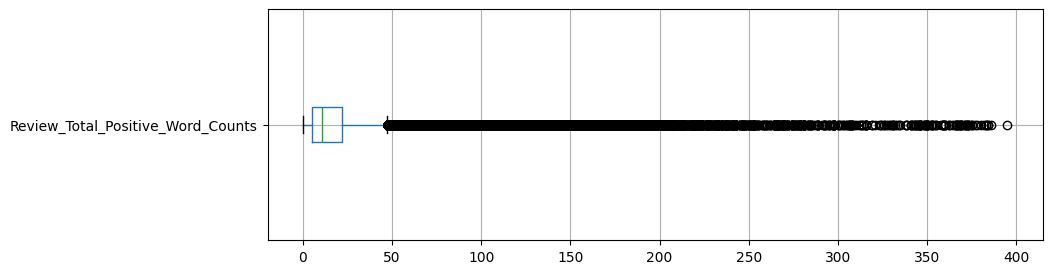

In [ ]:
# Посмотрим на распределение таких признаков, чтобы выявить выбросы

data[['Review_Total_Positive_Word_Counts']].boxplot(figsize=(10,3), vert = False)

In [ ]:
# Избавимся от выбросов, заменив все слишком большие и слишком маленькие значения на соответствующие персентили

for feature in num_features:
    pc_5 = int(np.percentile(data[feature].values, 5))
    pc_95 = int(np.percentile(data[feature].values, 95))

    data[feature] = data[feature].apply(lambda x: pc_5 if x < pc_5 else pc_95 if x > pc_95 else x )

<Axes: >

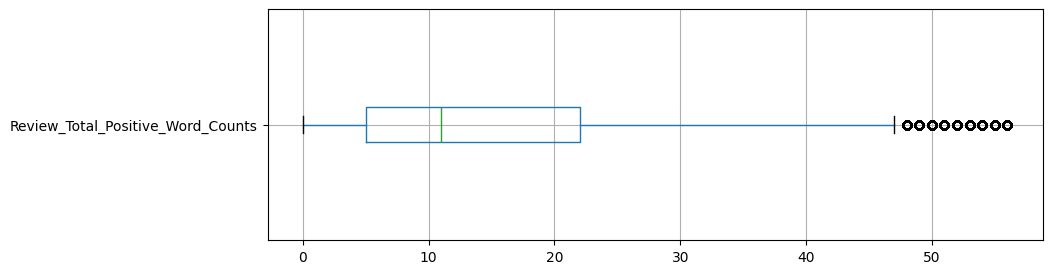

In [ ]:
data[['Review_Total_Positive_Word_Counts']].boxplot(figsize=(10,3), vert = False)

In [ ]:
# Нормализация
# Нормализуем оставшиеся признаки

from sklearn.preprocessing import Normalizer

features_to_norm = num_features

norm = Normalizer()
data[features_to_norm] = norm.fit_transform(data[features_to_norm])

In [ ]:
# Вынесем целевую колонку в начало для красоты

cols = list(data.columns)
cols.remove('Reviewer_Score')
cols.insert(0, 'Reviewer_Score')
len(cols)

450

In [ ]:
data = data[cols]

In [ ]:
data.iloc[:, :22].describe().T

,count,mean,std,min,25%,50%,75%,max
Reviewer_Score,515738.0,6.516039,4.033475,-1.000000,5.400000,8.300000,9.600000,10.000000
Additional_Number_of_Scoring,515738.0,0.165227,0.067854,0.038022,0.103640,0.159783,0.218995,0.333826
Hotel_Name,515738.0,0.513743,0.303111,0.000000,0.217975,0.533870,0.788062,1.000000
Reviewer_Nationality,515738.0,0.741345,0.295272,0.000000,0.491150,0.946903,0.946903,1.000000
Review_Total_Negative_Word_Counts,515738.0,0.009527,0.016010,0.000000,0.000270,0.003781,0.011309,0.154297
Total_Number_of_Reviews,515738.0,0.940398,0.077511,0.522597,0.938052,0.966854,0.981316,0.999158
Review_Total_Positive_Word_Counts,515738.0,0.010159,0.014542,0.000000,0.002027,0.005100,0.012035,0.125739
Total_Number_of_Reviews_Reviewer_Has_Given,515738.0,0.003917,0.006274,0.000133,0.000599,0.001549,0.004392,0.058737
days_since_review,515738.0,0.202779,0.185671,0.004260,0.066774,0.142527,0.279701,0.843837
lat,515738.0,0.029905,0.022807,0.006046,0.013042,0.022249,0.039295,0.117385


In [ ]:
# data.to_csv('data_train+test_prepared.csv.gz', compression = 'gzip', index=False)

In [ ]:
data

,Reviewer_Score,Additional_Number_of_Scoring,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,...,pn_190,pn_191,pn_192,pn_193,pn_194,pn_195,pn_196,pn_197,pn_198,pn_199
0,5.4,0.105719,0.187793,0.946903,0.042910,0.990652,0.004975,0.000622,0.067163,0.032338,...,0,0,0,0,0,0,0,0,0,0
1,9.6,0.104044,0.826962,0.557522,0.062974,0.908099,0.037419,0.000913,0.396096,0.047458,...,0,0,0,0,0,0,0,0,0,0
2,8.8,0.246879,0.764588,0.946903,0.003925,0.967681,0.003925,0.000620,0.049995,0.010638,...,0,0,0,0,0,0,0,0,0,0
3,10.0,0.126266,0.751174,0.672566,0.015925,0.983963,0.005688,0.023888,0.108065,0.054847,...,0,0,0,0,0,0,0,0,0,0
4,9.2,0.092961,0.144199,0.946903,0.001897,0.987787,0.006956,0.000632,0.122050,0.026172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,-1.0,0.094979,0.392354,0.946903,0.000000,0.993565,0.001731,0.001237,0.060598,0.011250,...,0,0,0,0,0,0,0,0,0,0
515734,-1.0,0.197721,0.788732,0.061947,0.012662,0.979350,0.027272,0.001948,0.015584,0.025089,...,0,0,0,0,0,0,0,1,0,0
515735,-1.0,0.198739,0.187123,0.946903,0.001237,0.967954,0.001980,0.000247,0.152952,0.012870,...,0,0,0,0,0,0,0,0,0,0
515736,-1.0,0.261749,0.940979,0.946903,0.001653,0.960481,0.013776,0.000276,0.092576,0.014191,...,0,0,0,0,0,0,0,0,0,0


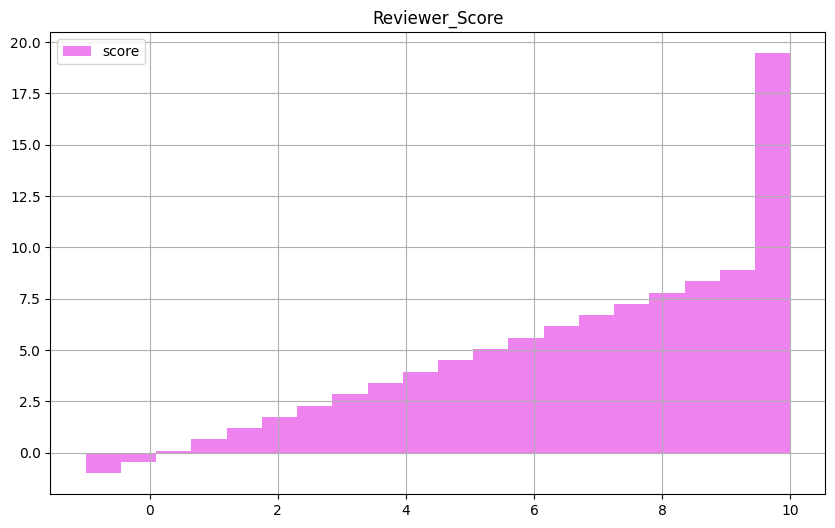

In [ ]:
# Посмотрим на распределение целевого признака

import matplotlib.pyplot as plt
import seaborn as sns

bins = 20

plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()

x = data['Reviewer_Score'].values
n_x, bins_x = np.histogram(x, bins = bins)

ax.set(title = "Reviewer_Score")
plt.hist(bins_x, bins, weights = bins_x, color = 'violet', label = "score")

ax.legend()
ax.grid()
plt.show()

-----------------------

In [ ]:
# Вытащим данные для самбита

data_to_submit = data[data['Reviewer_Score'] == -1].reset_index(drop = True)
data = data[data['Reviewer_Score'] != -1].reset_index(drop = True)

len(data_to_submit), len(data)

In [ ]:
# Важно сохранить индекс!

-----------------------

### 3. Корреляционный анализ данных и выбор признаков для построения моделей

In [ ]:
# Посмотрим на корреляцию таргета и первых 21 колонки (те, которые без префиксов)

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.iloc[:, :20].corr(), annot=True, fmt='.2f', cmap='YlGnBu')

In [ ]:
# Корреляция с целевым признаком
data.iloc[:, :20].corr()['Reviewer_Score'].sort_values()

In [ ]:
data.columns[20:42]

In [ ]:
cols = ["Reviewer_Score"] + list(data.columns[20:42])

In [ ]:
# А теперь - на корреляцию с тегами

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data[cols].corr(), annot=True, fmt='.2f', cmap='YlGnBu')

In [ ]:
# @title Текст заголовка по умолчанию
# Отфильтруем признаки - оставим только те, у которых величина корреляции с целевым больше 2%
# Их будет 173, что вместо изначальных 451 вполне неплохо

cols_to_train = []
corrs = []

for col in list(data.columns)[1:]:
    cor = data['Reviewer_Score'].corr(data[col])
    if cor >= 0.02:
        cols_to_train.append(col)
        corrs.append(cor)

print("colunms to train = ", len(cols_to_train))

cols_stats = pd.DataFrame()
cols_stats['col'] = cols_to_train
cols_stats['corr'] = corrs

cols_stats = cols_stats.sort_values(by = 'corr', ascending=[False])
cols_stats

In [ ]:
# Корреляция между целевым и наиболее влиятельными признаками:
sns.pairplot(data[['Reviewer_Score', 'rn_116', 'pn_164', 'Review_Total_Positive_Word_Counts']], hue='Reviewer_Score')

In [ ]:
data = data[['Reviewer_Score'] + cols_to_train]
print(data.shape)
data.head(3)

In [ ]:
data_to_submit = data_to_submit[cols_to_train]
print(data_to_submit.shape)
data_to_submit.head(3)

-------------------

### 4. Выбор подходящих моделей для решения задачи регрессии

Для задачи регрессии будем использовать следующие модели:

- Линейная регрессия
- Градиентный бустинг с CatBoost
- Градиентный бустинг с xgboost
- Градиентный бустинг с lightgbm

### 5. Поделим данные на трейн и тест

In [ ]:
data['Reviewer_Score'] = np.log(data['Reviewer_Score'])

На основе наших обработанных данных выделим тестовую и обучающую выборки:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data[cols_to_train], data['Reviewer_Score'], test_size=0.10)
print (X_test.shape, Y_test.shape)
print (X_train.shape, Y_train.shape)

### 6. Применение трансформеров

Применение трансформеров к векторизированным признакам (тегам и отзывам)

Tf-idf-трансформер позволяет оценить важность слова среди остальных - например, если слово встречается практически в каждом
отзыве, оно не очень информативно, и поэтому получит меньшую оценку. С другой стороны, появление редких слов имеет большее значение, поэтому их оценка выше.

По сути, мы просто заменяем все единички такими оценками.

Важно отметить, что мы обучаем трансформер на трейновой выборке - т.к. это такая же модель, и она не должна видеть тестовые данные.

Из колонок негативных отзывов в итоговый список попала всего одна - для неё транформация не нужна.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tags_tf = TfidfTransformer(norm='l2', sublinear_tf=True, smooth_idf=False)
pr_tf = TfidfTransformer(norm='l2', sublinear_tf=True, smooth_idf=False)

**Гиперпараметры:**

- **norm='l2'** - показывает, как нормализуются строки в матрице TF-IDF.  
'l2' нормализация означает, что каждый вектор нормализуется так, чтобы квадрат суммы его элементов был равен 1, что помогает снизить влияние длины документа на результат.
  
  
- **sublinear_tf=True** - нужно ли применять логарифмическую шкалу к частоте слов.  
В данном случае используется логарифмическое масштабирование: вместо использования фактической частоты терма используется 1 + log(tf), где tf — частота терма в документе. Это помогает уменьшить влияние очень часто встречающихся слов.
  
  
- **smooth_idf=False** - нужно ли сглаживать веса.  
Если smooth_idf=True, то к числу документов добавляется 1, чтобы избежать деления на ноль, и IDF вычисляется как log((1 + n) / (1 + df)) + 1, где n — общее число документов, а df — число документов, содержащих терм.
Если smooth_idf=False, то сглаживание не применяется, и IDF вычисляется как log(n / df) + 1.

In [ ]:
# Обучаемся на нужных колонках и здесь же преобразуем их

X_train.iloc[:, X_train.columns.str.startswith('tag_')] = tags_tf.fit_transform(X_train.iloc[:, X_train.columns.str.startswith('tag_')]).todense()
print("tags ok")

X_train.iloc[:, X_train.columns.str.startswith('pn_')] = pr_tf.fit_transform(X_train.iloc[:, X_train.columns.str.startswith('pn_')]).todense()
print("positive reviews ok")

In [ ]:
# Сохраняем транформеры - теперь с их помощью мы можем обрабатывать все данные, посылаемые в модель

import pickle

with open('tags_tf.pickle', 'wb') as f:
    pickle.dump(tags_tf, f)

with open('pr_tf.pickle', 'wb') as f:
    pickle.dump(pr_tf, f)

print('Saved')

In [ ]:
# Преобразуем тестовые данные

X_test.iloc[:, X_test.columns.str.startswith('tag_')] = tags_tf.transform(X_test.iloc[:, X_test.columns.str.startswith('tag_')]).todense()
print("tags ok")

X_test.iloc[:, X_test.columns.str.startswith('pn_')] = pr_tf.transform(X_test.iloc[:, X_test.columns.str.startswith('pn_')]).todense()
print("positive reviews ok")

In [ ]:
# И данные для сабмита

data_to_submit.iloc[:, data_to_submit.columns.str.startswith('tag_')] = tags_tf.transform(data_to_submit.iloc[:, data_to_submit.columns.str.startswith('tag_')]).todense()
print("tags ok")

data_to_submit.iloc[:, data_to_submit.columns.str.startswith('pn_')] = pr_tf.transform(data_to_submit.iloc[:, data_to_submit.columns.str.startswith('pn_')]).todense()
print("positive reviews ok")

---------------------------------------------

### 7. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict, KFold

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [ ]:
# Функция для метрики мар

def count_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

In [ ]:
# Модели
class_models = {
                'LinReg_sklearn': LinearRegression(n_jobs = 12),
                'Cat_boosting':CatBoostRegressor(logging_level='Silent'),
                'Xg_boosing':XGBRegressor(),
                'Lgbm_boosting': lgb.LGBMRegressor()
              }

In [ ]:
#Функция для обучения и применения указанной модели

models = []
mape_cv = []
mape_test = []

def class_train_model(model_name, model):
    print('\n\n--------------------------------------')
    print(model_name)
    print(model)
    print()

    models.append(model_name)

    model.fit(X_train, Y_train)

    predict_test = model.predict(X_test)
    predict_train_cv = cross_val_predict(model, X_train, Y_train, cv=3)

    print ('\nОценка результатов MAPE')

    train = count_mape(Y_train, predict_train_cv)
    test = count_mape(Y_test, predict_test)
    print('Трейн:', train)
    print('Тест:', test)

    mape_cv.append(round(train, 3))
    mape_test.append(round(test, 3))

In [ ]:
%%time

for model_name, model in class_models.items():
    class_train_model(model_name, model)

In [ ]:
stats = pd.DataFrame()
stats['model'] = models
stats['mape_cv'] = mape_cv
stats['mape_test'] = mape_test
stats

Для baseline возьмём модель Xg_boosing.

---------------------------

### 8. Сабмит (сделаем пример)

In [ ]:
model = LinearRegression(n_jobs=12)

predict_train_cv = cross_val_predict(model, X_train, Y_train, cv=3)

In [ ]:
model.fit(X_train, Y_train)

predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [ ]:
print(f"Качество train: {round(count_mape(Y_train, predict_train), 3)}")
print(f"Качество CV: {round(count_mape(Y_train, predict_train_cv), 3)}")
print(f"Качество test: {round(count_mape(Y_test, predict_test), 3)}")

In [ ]:
predict_submit = model.predict(data_to_submit)
print(len(predict_submit))
predict_submit

In [ ]:
res = pd.DataFrame()
res['prediction'] = np.exp(predict_submit)
res['id'] = res.index

res = res[['id', 'prediction']]
res.head()

In [ ]:
res.to_csv('submission.csv', index = False)

--------------------------